                        **Proyecto 2 Ingeniería de features**
                                                                        Agosto, 2021

                                                            Tomás von Bischoffshausen


#### 1. Preprocesamiento

In [2]:
# importo el dataset

import pandas as pd
df = pd.read_csv("/Users/tomtom/Documents/Acamica Data Science Bootcamp/Acamica Sprint 1/Datos_Properati.csv")
print("df shape: ", df.shape)
df.head(2)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/tomtom/Documents/Acamica Data Science Bootcamp/Acamica Sprint 1/Datos_Properati.csv'

In [ ]:
# evalúo el tamaño del 
import sys
sys.getsizeof(df)/100

In [3]:
#visualizo las variables que podrían servir a mi análisis

df.columns

Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
       'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'currency', 'title', 'description', 'property_type',
       'operation_type'],
      dtype='object')

In [4]:
# visualizo el porcentaje de las clases de la variable tipo de propiedad

df.property_type.value_counts(normalize=True)*100

Departamento       73.180145
Casa               14.674076
PH                  9.749080
Lote                0.894586
Oficina             0.448657
Otro                0.255012
Local comercial     0.221601
Casa de campo       0.219555
Depósito            0.180690
Cochera             0.176599
Name: property_type, dtype: float64

In [5]:
# filtro el df, quedándome únicamente con los datos que posean las clases Departamento, Casa, y PH

df = df[df.property_type.isin(["Departamento", "Casa","PH"])]

In [6]:
# visualizo el porcentaje de las clases de la variable l2

df["l2"].value_counts(normalize=True)*100

Capital Federal             63.910720
Bs.As. G.B.A. Zona Norte    16.554543
Bs.As. G.B.A. Zona Sur      11.047539
Bs.As. G.B.A. Zona Oeste     8.487198
Name: l2, dtype: float64

In [7]:
# creo una variable para rescatar el peso del m2 en cada región sin considerar el precio (pues es el target)
# luego veré si la usaré..

df["m2"]  = df.price / df.surface_total
media = df[["m2","l3"]].groupby("l3").agg(pd.Series.mean)
media = media.to_dict()["m2"]
df.l3 = df.l3.map(media)
df.drop(columns=["m2"], inplace=True)

In [8]:
# filtro del df con las variables que me interesan

df = df[["property_type","l3","lat","lon","rooms","bedrooms","bathrooms","surface_total","surface_covered","price"]]
df.head(2)

,property_type,l3,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,Departamento,1932.420207,-34.605880,-58.384949,7.0,7.0,2.0,140.0,140.0,153000.0
1,PH,2041.570918,-34.624056,-58.412110,2.0,1.0,2.0,70.0,58.0,159000.0


In [9]:
# hago un encoding para variable categórica relevante

df = pd.get_dummies(df, columns=["property_type"])
df.head(2)

,l3,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type_Casa,property_type_Departamento,property_type_PH
0,1932.420207,-34.605880,-58.384949,7.0,7.0,2.0,140.0,140.0,153000.0,0,1,0
1,2041.570918,-34.624056,-58.412110,2.0,1.0,2.0,70.0,58.0,159000.0,0,0,1


In [10]:
# detección de valores nulos
df.isnull().mean()

l3                            0.000000
lat                           0.067016
lon                           0.067233
rooms                         0.000000
bedrooms                      0.000000
bathrooms                     0.029418
surface_total                 0.130099
surface_covered               0.132097
price                         0.000000
property_type_Casa            0.000000
property_type_Departamento    0.000000
property_type_PH              0.000000
dtype: float64

<AxesSubplot:>

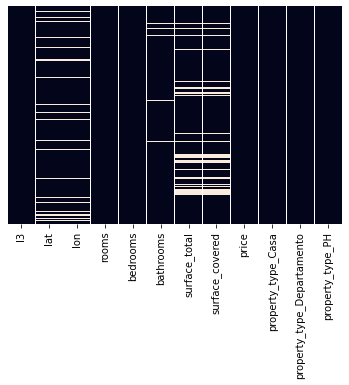

In [11]:
import seaborn as sns
sns.heatmap(df.isnull(),yticklabels=False, cbar=False)

In [12]:
# eliminación de valores nulos, en ningún caso se supera el 10% de los datos

df.dropna(inplace=True)

In [13]:
# eliminación de duplicados

df.drop_duplicates(inplace=True)

In [14]:
# ver la nueva forma

df.shape

(76298, 12)

<AxesSubplot:xlabel='l3'>

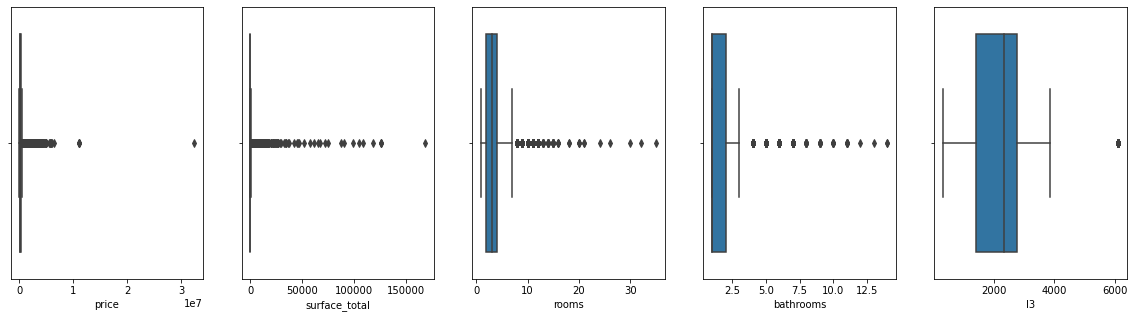

In [15]:
# visualización de outliers

import matplotlib.pyplot as plt
import seaborn as sns
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5,figsize=(20,5))
sns.boxplot(data=df, x="price",ax=ax1)
sns.boxplot(data=df, x="surface_total",ax=ax2)
sns.boxplot(data=df, x="rooms",ax=ax3)
sns.boxplot(data=df, x="bathrooms",ax=ax4)
sns.boxplot(data=df, x="l3",ax=ax5)


#sns.boxplot(data=df, x="",ax=ax8)

In [16]:
# defino una función que encuentra limite inferior y superior de distribuciones

def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)
    return upper_boundary, lower_boundary

Rooms

In [17]:
# encuentro límites y elimino outliers

rooms_upper_limit, rooms_lower_limit = find_skewed_boundaries(df, "rooms", 1.5)
print("limits: ", rooms_lower_limit, rooms_upper_limit)
df.drop(df[ (df.rooms > rooms_upper_limit) | (df.rooms < rooms_lower_limit) ].index , inplace=True)

limits:  -1.0 7.0


In [18]:
print("quantiles 1-3: ", df.rooms.quantile(0.01), df.rooms.quantile(0.99))

quantiles 1-3:  1.0 7.0


Bedrooms

In [19]:
# encuentro límites y elimino outliers

bedrooms_upper_limit, bedrooms_lower_limit = find_skewed_boundaries(df, "bedrooms", 1.5)
print("limits: ", bedrooms_lower_limit, bedrooms_upper_limit)
df.drop(df[ (df.bedrooms > rooms_upper_limit) | (df.bedrooms < rooms_lower_limit) ].index , inplace=True)

limits:  -2.0 6.0


In [20]:
print("quantiles: ", df.bedrooms.quantile(0.01), df.rooms.quantile(0.99))

quantiles:  1.0 7.0


Bathrooms

In [21]:
# encuentro límites y elimino outliers

bathrooms_upper_limit, bathrooms_lower_limit = find_skewed_boundaries(df, "bathrooms", 1.5)
print("limits: ", bathrooms_lower_limit, bedrooms_upper_limit)
df.drop(df[ (df.bathrooms > rooms_upper_limit) | (df.bathrooms < rooms_lower_limit)].index , inplace=True)

limits:  -0.5 6.0


In [22]:
# imprimo los valores del primer y tercer cuartil para ver si tienen sentido

print("quantiles: ", df.bathrooms.quantile(0.01), df.rooms.quantile(0.99))

quantiles:  1.0 7.0


Surface_total

In [23]:
# encuentro límites y elimino outliers

surface_total_upper_limit, surface_total_lower_limit = find_skewed_boundaries(df, "surface_total", 1.5)
print("limits: ", surface_total_lower_limit,surface_total_upper_limit)
df.drop(df[(df.surface_total > surface_total_upper_limit) | (df.surface_total < surface_total_lower_limit)].index , inplace=True)


limits:  -84.5 279.5


In [24]:
# imprimo los valores del primer y tercer cuartil para ver si tienen sentido

print("quantiles: ", df.surface_total.quantile(0.01), df.surface_total.quantile(0.99))

quantiles:  26.0 261.0


Price

In [25]:
# encuentro límites y elimino outliers

price_upper_limit, price_lower_limit = find_skewed_boundaries(df, "price", 1.5)
df.drop(df[ (df.price > price_upper_limit) | (df.price < price_lower_limit) ].index , inplace=True)
print(price_lower_limit, price_upper_limit)

-93000.0 443000.0


In [26]:
# imprimo los valores del primer y tercer cuartil para ver si tienen sentido

print("quantiles: ", df.price.quantile(0.01), df.price.quantile(0.99))

quantiles:  47800.0 420000.0


l3

In [27]:
# encuentro límites y elimino outliers

l3_upper_limit, l3_lower_limit = find_skewed_boundaries(df, "price", 1.5)
df.drop(df[ (df.l3 > l3_upper_limit) | (df.l3 < l3_lower_limit) ].index , inplace=True)
print(price_lower_limit, price_upper_limit)

-93000.0 443000.0


In [28]:
# imprimo los valores del primer y tercer cuartil para ver si tienen sentido

print("quantiles: ", df.l3.quantile(0.01), df.l3.quantile(0.99))

quantiles:  657.3286114641078 3529.4034529706987


<AxesSubplot:xlabel='l3'>

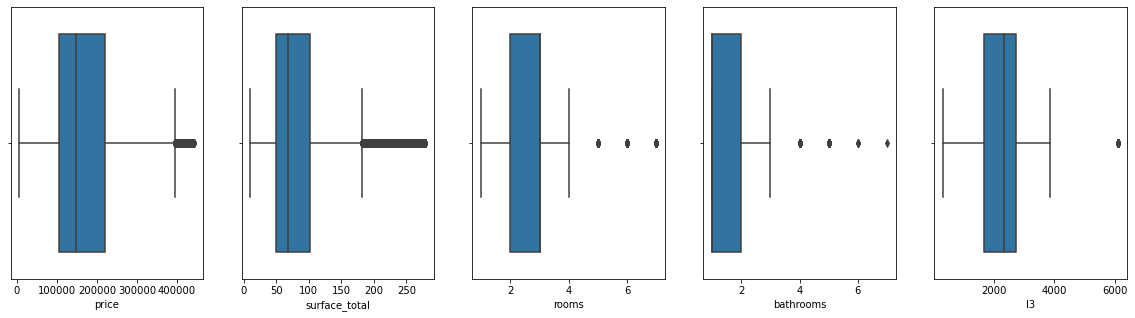

In [29]:
# ploteo la distibución de las variables post eliminación de outliers, nulos y duplicados.

import matplotlib.pyplot as plt
import seaborn as sns
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5,figsize=(20,5))
sns.boxplot(data=df, x="price",ax=ax1)
sns.boxplot(data=df, x="surface_total",ax=ax2)
sns.boxplot(data=df, x="rooms",ax=ax3)
sns.boxplot(data=df, x="bathrooms",ax=ax4)
sns.boxplot(data=df, x="l3",ax=ax5)

In [30]:
# df shape
df.shape

(62789, 12)

In [31]:
# Defino variables independientes y dependientes para los modelos

X = df.drop(["price","l3"],axis=1)
y = df['price']

In [32]:
X.head(2)

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,property_type_Casa,property_type_Departamento,property_type_PH
0,-34.605880,-58.384949,7.0,7.0,2.0,140.0,140.0,0,1,0
1,-34.624056,-58.412110,2.0,1.0,2.0,70.0,58.0,0,0,1


In [33]:
# escalo las Xs

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scl = StandardScaler()
X = scl.fit_transform(X)

In [34]:
# aplico de train-test split sobre los datos

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1)

***

#### Árbol de decisión

In [34]:
# entreno el árbol de decisión regresor

from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(max_depth=None)


In [35]:
# entreno el modelo

tree = tree.fit(X_train,y_train)

In [36]:
# predigo sobre el set de train y test

y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

In [37]:
# evalúo sobre train y test

from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import numpy as np

# Mean Absolut Error
MAE_train = mean_absolute_error(y_train, y_train_pred)
MAE_test= mean_absolute_error(y_test, y_test_pred)

# Mean Squared Error
RMSE_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
RMSE_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# R2 Score
r2_train = metrics.r2_score(y_train, y_train_pred)
r2_test = metrics.r2_score(y_test, y_test_pred)

# imprimo las métricas de evaluación del modelo
print("MAE_train_arbol: ", MAE_train)
print("MAE_test_arbol: ", MAE_test)
print("RMSE_train_arbol: ",RMSE_train)
print("RMSE_test_arbol: ",RMSE_test)
print("R2_train_arbol", r2_train)
print("R2_test_arbol",r2_test)

MAE_train_arbol:  1595.556386491916
MAE_test_arbol:  28209.328300912424
RMSE_train_arbol:  5042.654118965286
RMSE_test_arbol:  45235.42768916296
R2_train_arbol 0.9966815318029547
R2_test_arbol 0.731589947111198


In [38]:
# aplico Cross Validation como técnica de muestreo para evaluar el rendimiento del modelo

from sklearn.model_selection import cross_val_score

dt_scores = cross_val_score(tree, X_train, y_train, cv = 5)
print("mean cross validation score: {}".format(np.mean(dt_scores)))
print("score without cv: {}".format(tree.score(X_train, y_train)))

# en el test or hold-out set
from sklearn.metrics import r2_score

print("test r2_score",r2_score(y_test, tree.predict(X_test)))
print("test score ", tree.score(X_test, y_test))

mean cross validation score: 0.7087601288565355
score without cv: 0.9966815318029547
test r2_score 0.731589947111198
test score  0.731589947111198


In [39]:
# aplico Grid Search como técnica de optimización de hyperparámetros

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

def dtree_grid_search(X,y,nfolds):
    #create a dictionary of all values we want to test
    param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 30)}
    # decision tree model
    dtree_model=DecisionTreeClassifier()
    #use gridsearch to test all values
    dtree_gscv = GridSearchCV(dtree_model, param_grid, cv=nfolds)
    #fit model to data
    dtree_gscv.fit(X, y)
    return dtree_gscv.best_params_

dtree_grid_search(X,y,5)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


{'criterion': 'entropy', 'max_depth': 29}

In [40]:
# creo un nuevo Decision Tree con max_depth óptimo y evalúo

tree = DecisionTreeRegressor(max_depth=22)
tree = tree.fit(X_train,y_train)
y_arbol_train_pred = tree.predict(X_train)
y_arbol_test_pred = tree.predict(X_test)

MAE_train_arbol = mean_absolute_error(y_train, y_arbol_train_pred)
MAE_test_arbol = mean_absolute_error(y_test, y_arbol_test_pred)
RMSE_train_arbol = np.sqrt(mean_squared_error(y_train, y_arbol_train_pred))
RMSE_test_arbol = np.sqrt(mean_squared_error(y_test, y_arbol_test_pred))
r2_train_arbol = metrics.r2_score(y_train, y_arbol_train_pred)
r2_test_arbol = metrics.r2_score(y_test, y_arbol_test_pred)

print("MAE_train_arbol: ", MAE_train_arbol)
print("MAE_test_arbol: ", MAE_test_arbol)
print("RMSE_train_arbol: ",RMSE_train_arbol)
print("RMSE_test_arbol: ",RMSE_test_arbol)
print("R2_train_arbol", r2_train_arbol)
print("R2_test_arbol",r2_test_arbol)


MAE_train_arbol:  3536.8895446055526
MAE_test_arbol:  28034.91321469467
RMSE_train_arbol:  8656.557307884621
RMSE_test_arbol:  44656.29400284461
R2_train_arbol 0.9902206561643461
R2_test_arbol 0.7384186764844809


**Nota**

El modelo con preprocesamiento presenta un alto sesgo y una alta varianza.

***Nota*** 

Podemos ver que el R2 en test de el árbol con y sin procesamiento tienen una diferencia de .02 postiva para el modelo con datos preprocesados.

R2_test_arbol 1:  0.7126611322908869

R2_test_arbol 2: 0.7362027968433764**

***

#### Random Forest

Utilizaremos este modelo para ver los efectos que tiene en el bias y la varianza, espero que ambos disminuyan.

In [42]:
# importo la librería
from sklearn.ensemble import RandomForestRegressor

In [43]:
# entreno el modelo, le doy los estimdores, el número de núcleos con que trabajar, dejo un pedazo out of the bag
clf = RandomForestRegressor(n_estimators=100, n_jobs=-1, oob_score =True, random_state =42)
clf.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, oob_score=True, random_state=42)

In [44]:
# evalúo los puntajes de los modelos con cross validation: cinco muestras
clf_scores = cross_val_score(clf,X_train, y_train, cv=5)
clf_scores

array([0.84616917, 0.84654398, 0.83878349, 0.84496419, 0.83721102])

In [45]:
# hago las predicciones sobre el train y el test set para luego aplicar métricas de evaluación
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [110]:
# métricas de evaluación
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import numpy as np

MAE_reg = mean_absolute_error(y_train, y_train_pred)
MAE_test = mean_absolute_error(y_test, y_test_pred)
RMSE_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
RMSE_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_train = metrics.r2_score(y_train, y_train_pred)
r2_test = metrics.r2_score(y_test, y_test_pred)

# imprimimos las métricas de evaluación del modelo
print("MAE_reg: ", MAE_reg)
print("MAE_test: ", MAE_test)
print("RMSE_train: ",RMSE_train)
print("RMSE_test: ",RMSE_test)
print("R2_train_arbol", r2_train)
print("R2_test_arbol",r2_test)

MAE_reg:  30994.866138955833
MAE_test:  186216.2699096053
RMSE_train:  42332.36410985918
RMSE_test:  7711243.426151182
R2_train_arbol 0.766135476980488
R2_test_arbol -7798.920964050449


***Nota***

Efectivamente, la técnica de bagging disminuyó tanto el sesgo (.99 - .97) como la varianza (.16 - .12) del modelo.

In [47]:
# evalúo el clasificador out of the bag

clf.oob_score_

0.8495980400988133

***Nota***

Mediante la evaluación del modelo en un pedazo del dataset apartado en un comienzo (out of the bag), podemos ver que el rendimiento es similar al de test.

In [48]:
# importo randomizeSearchCV para implementar un Adaboost y ver sus efectos...

from sklearn.model_selection import RandomizedSearchCV

In [49]:
# aplico un adaboost para encontrar los mejores parámetros

param_dist = {"n_estimators":[10,50,100,500,1000], "max_features":[2,3,4,5]}

ada_clf = RandomizedSearchCV(RandomForestRegressor(), 
                          param_distributions = param_dist,
                          cv=3,
                          n_iter=10,
                          n_jobs=-1)

ada_clf.fit(X_train, y_train)
ada_clf.best_params_

{'n_estimators': 1000, 'max_features': 5}

In [50]:
# vuelvo a aplicar el random forest, esta vez con los parámetros óptimos encontrados con adaboost

clf = RandomForestRegressor(n_estimators=500, max_features=5, n_jobs=-1, oob_score=True, random_state=42)

In [51]:
# entreno el modelo

clf.fit(X_train,y_train)

RandomForestRegressor(max_features=5, n_estimators=500, n_jobs=-1,
                      oob_score=True, random_state=42)

In [52]:
# hago las predicciones con el regresor optimizado

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [53]:
# métricas de evaluación

MAE_reg = mean_absolute_error(y_train, y_train_pred)
MAE_test = mean_absolute_error(y_test, y_test_pred)
RMSE_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
RMSE_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_train = metrics.r2_score(y_train, y_train_pred)
r2_test = metrics.r2_score(y_test, y_test_pred)

# Imprimimos las métricas de evaluación del modelo
print("MAE_reg: ", MAE_reg)
print("MAE_test: ", MAE_test)
print("RMSE_train: ",RMSE_train)
print("RMSE_test: ",RMSE_test)
print("R2_train_arbol", r2_train)
print("R2_test_arbol",r2_test)

MAE_reg:  8906.337775039081
MAE_test:  22236.20573809492
RMSE_train:  13067.861035594222
RMSE_test:  32971.15927737184
R2_train_arbol 0.9777141956230613
R2_test_arbol 0.8574031898029493


**Nota**

Al implementar el randomforest optimizado (features y estimadores), vemos una mejoría del R2 de test que va desde 0.8514 (RF sin optimización) a 0.8555 (RF con optimización).

In [54]:
# veo el score: out of the bag, para validar la generalziación del renadom forest optimizado

clf.oob_score_

0.8531285371633279

In [55]:
# si quiero, puedo coger al azar un estimador y solicitar los parámetros

#clf.estimators_[40]
#clf.get_params()

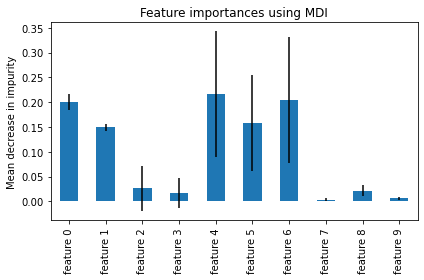

In [70]:
# vemos el peso de cada variable en el modelo

std = np.std([
    tree.feature_importances_ for tree in clf.estimators_], axis=0)
feature_names = [f'feature {i}' for i in range(X.shape[1])]
importances = clf.feature_importances_

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

***

#### Regresión Lineal Múltiple

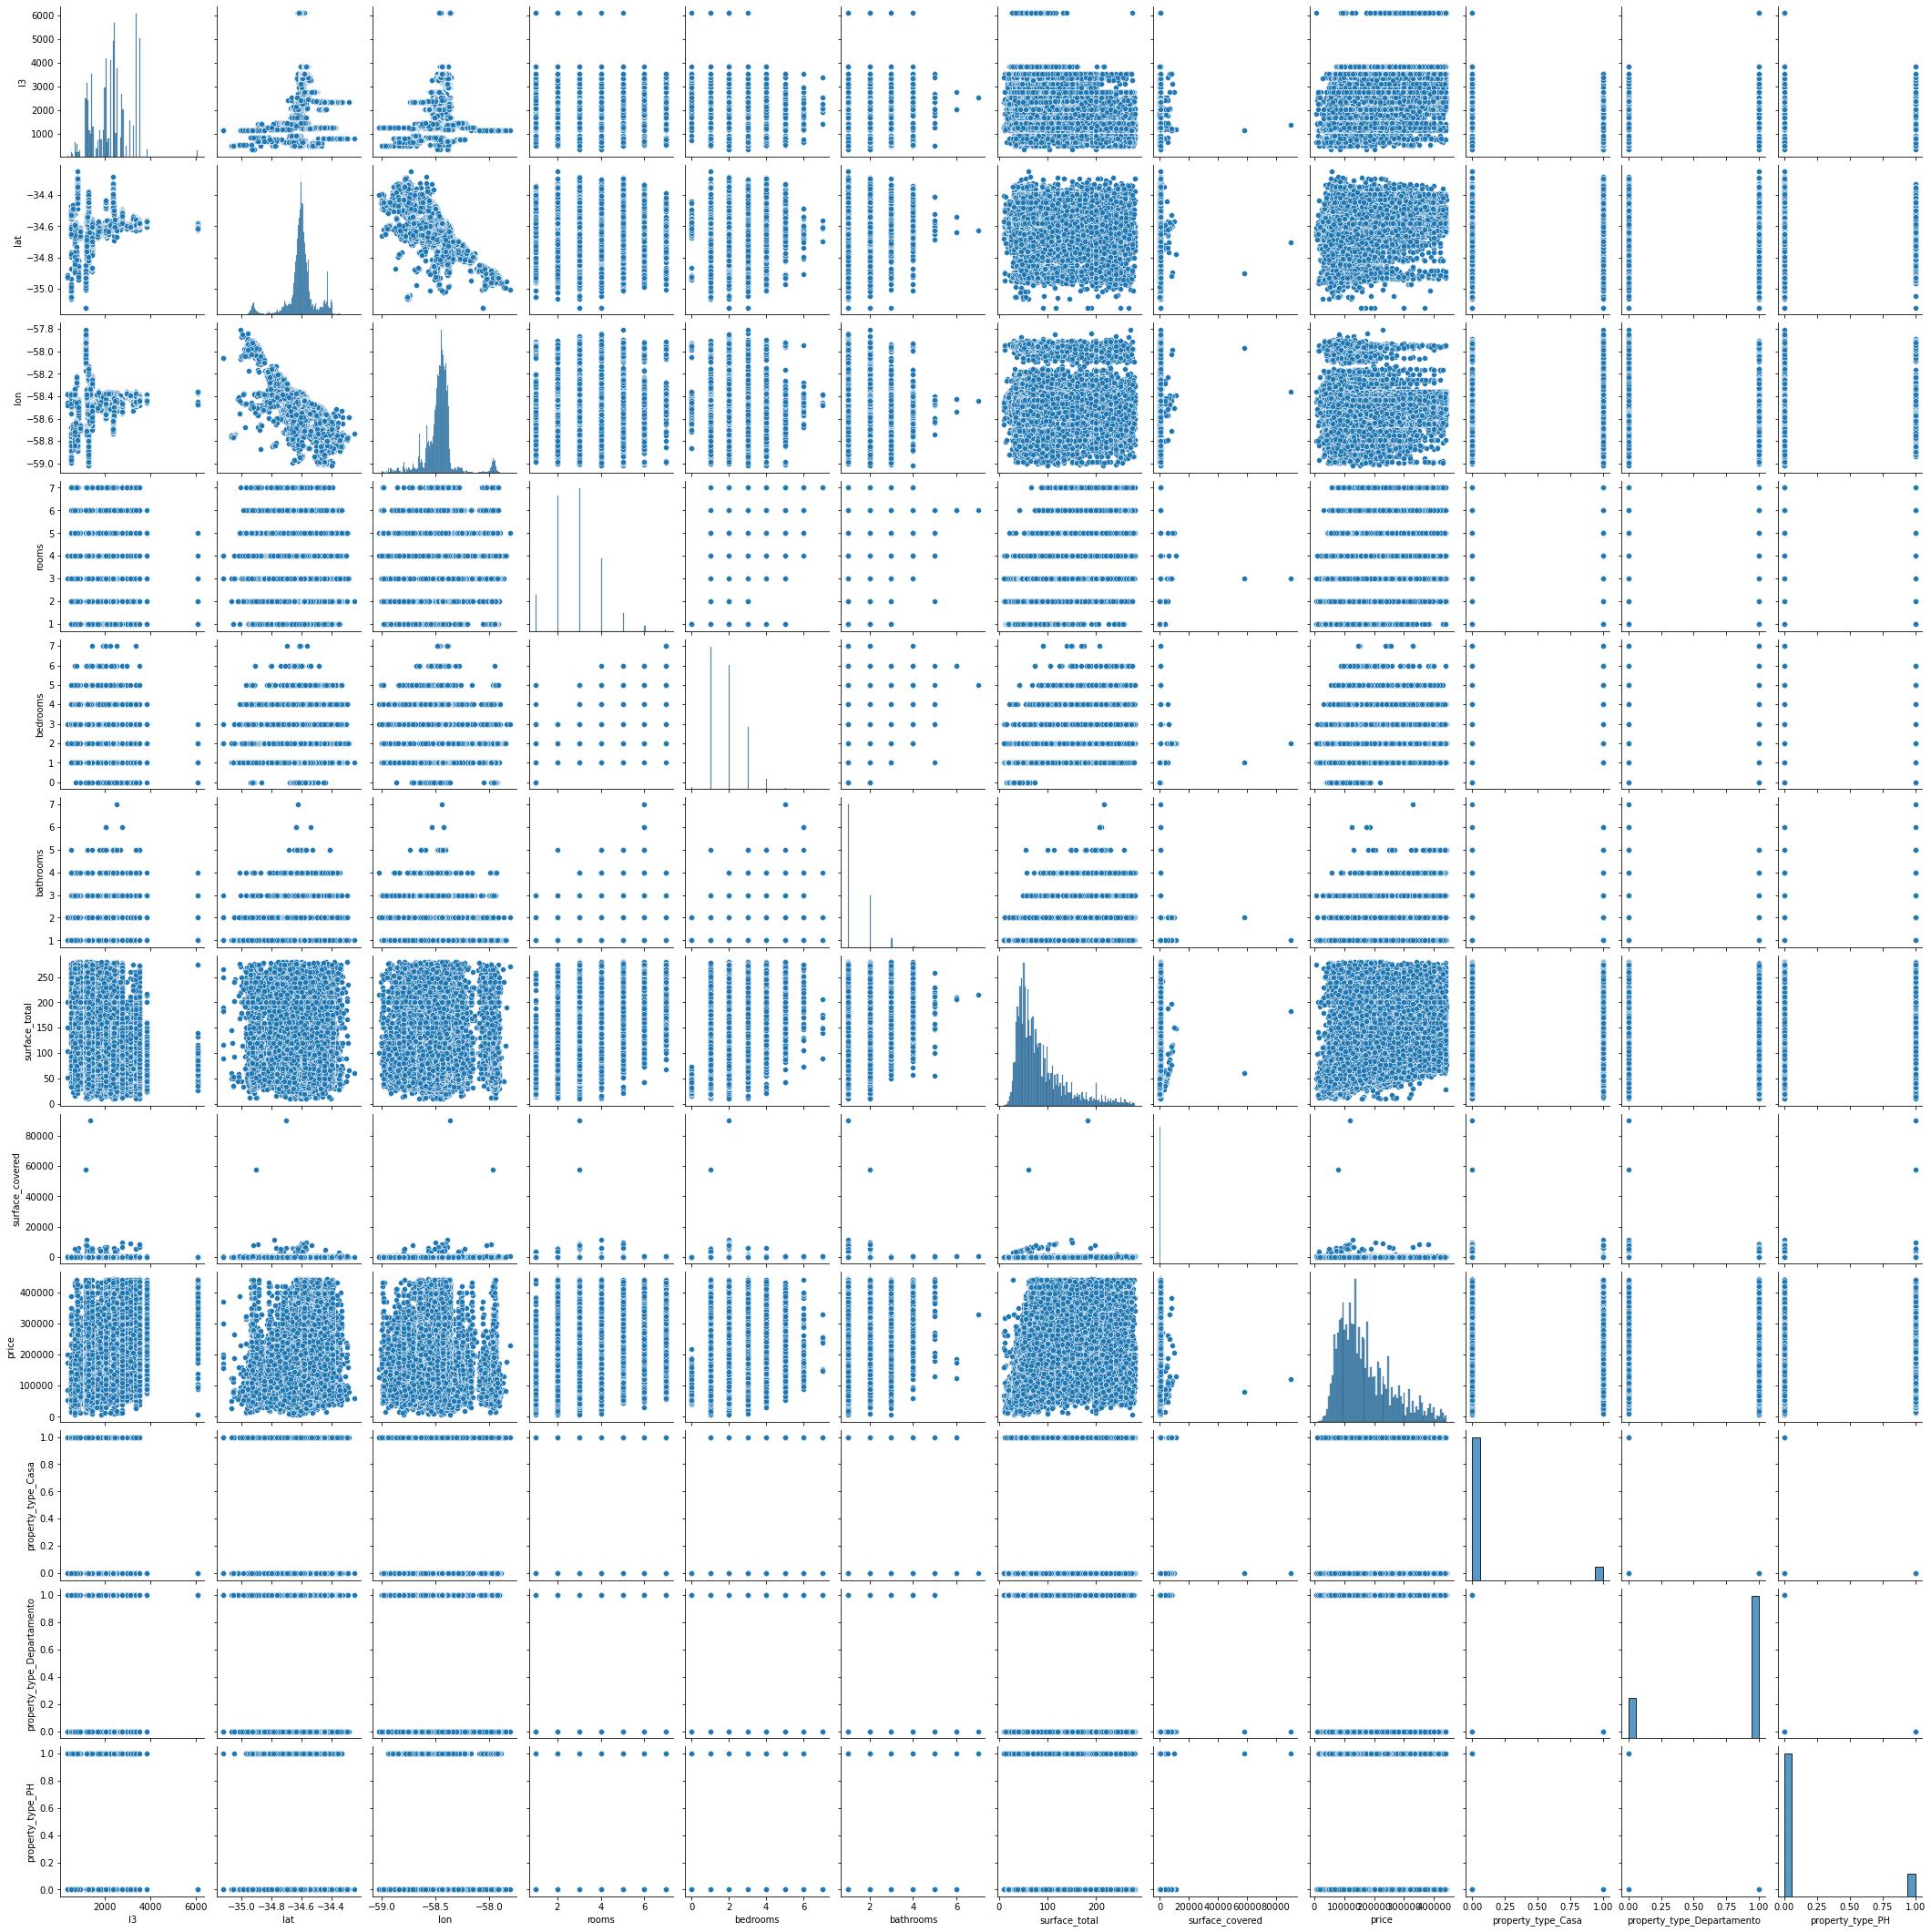

In [71]:
# visualizo correlaciones de manera gráfica

sns.pairplot(df)

<AxesSubplot:>

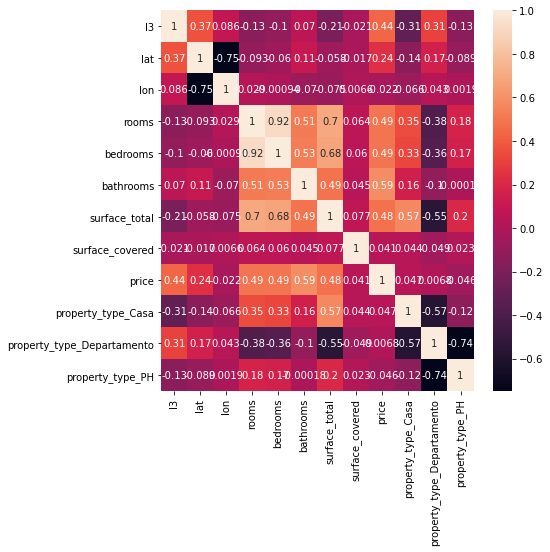

In [72]:
# visualizo correlación con magnitud y dirección

fig =plt.subplots(figsize=(7,7))
sns.heatmap(df.corr(), annot=True)

In [101]:
# importo librerías relevantes
import numpy as np
sns.set()

In [102]:
# importo la librería con la regresión lineal

from sklearn.linear_model import LinearRegression
reg_1 = LinearRegression()

In [103]:
# entreno el modelo

reg_1.fit(X_train, y_train)

LinearRegression()

In [104]:
# predigo sobre train y test

y_train_pred = reg_1.predict(X_train)
y_test_pred = reg_1.predict(X_test)

In [111]:
# métricas de evaluación

MAE_reg = mean_absolute_error(y_train, y_train_pred)
MAE_test = mean_absolute_error(y_test, y_test_pred)
RMSE_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
RMSE_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_train = metrics.r2_score(y_train, y_train_pred)
r2_test = metrics.r2_score(y_test, y_test_pred)

print("MAE_reg: ", MAE_reg)
print("MAE_test: ", MAE_test)
print("RMSE_train: ",RMSE_train)
print("RMSE_test: ",RMSE_test)
print("R2_train_arbol", r2_train)
print("R2_test_arbol",r2_test)


MAE_reg:  30994.866138955833
MAE_test:  186216.2699096053
RMSE_train:  42332.36410985918
RMSE_test:  7711243.426151182
R2_train_arbol 0.766135476980488
R2_test_arbol -7798.920964050449


In [106]:
print(X_train.shape, X_test.shape)

(56510, 10) (6279, 10)


In [38]:
# aplico Polyomial Features para extender la cantidad de variables y complejizar el modelo

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(7, include_bias=False)
X_train_new = poly.fit_transform(X_train)
X_test_new = poly.fit_transform(X_test)
print(X_train_new.shape, X_test_new.shape)

(56510, 19447) (6279, 19447)


In [39]:
# entreno la regresion lineal con los nuevos features

reg_2 = LinearRegression()
reg_2.fit(X_train_new, y_train)
y_train_pred = reg_2.predict(X_train_new)
y_test_pred = reg_2.predict(X_test_new)

NameError: name 'LinearRegression' is not defined

In [112]:
# métricas de evaluación regresión lineal con nuevos features

MAE_reg = mean_absolute_error(y_train, y_train_pred)
MAE_test = mean_absolute_error(y_test, y_test_pred)
RMSE_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
RMSE_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_train = metrics.r2_score(y_train, y_train_pred)
r2_test = metrics.r2_score(y_test, y_test_pred)

print("MAE_reg: ", MAE_reg)
print("MAE_test: ", MAE_test)
print("RMSE_train: ",RMSE_train)
print("RMSE_test: ",RMSE_test)
print("R2_train_arbol", r2_train)
print("R2_test_arbol",r2_test)

MAE_reg:  30994.866138955833
MAE_test:  186216.2699096053
RMSE_train:  42332.36410985918
RMSE_test:  7711243.426151182
R2_train_arbol 0.766135476980488
R2_test_arbol -7798.920964050449


***

#### Regresión con Regularización (Ridge y Lasso)

In [41]:
# Importo Ridge y Lasso

from sklearn.linear_model import Ridge, Lasso

Regresión Ridge

In [42]:
def evaluar_regresion(model,x,y, X_train, X_test, y_train, y_test):
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    ### CALCULAMOS EL ERROR
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

    
    ### GRAFICAMOS LOS RESULTADOS
    plt.figure(figsize = (12,4))
    plt.subplot(1,3,1)
    plt.scatter(x,y, s = 2, label = 'Datos')
    plt.plot(x, y_real, '--',label ='Curva Teórica', c = 'r')
    
    list1, list2 = zip(*sorted(zip(X_train[:,0], y_train_pred)))
    plt.plot(list1, list2,label ='Regresión (train)')
    
    list1, list2 = zip(*sorted(zip(X_test[:,0], y_test_pred)))
    plt.plot(list1, list2,label = 'Regresión (test)')

    
#     plt.scatter(X_train[:,0],y_train_pred,label ='Regresión (train)', s = 8)
#     plt.scatter(X_test[:,0],y_test_pred,label = 'Regresión (test)', s = 8)

    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()


    plt.subplot(1,3,2)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()

    ax = plt.subplot(1,3,3)
    ax.scatter(y_test,y_test_pred, s =2)

    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]

    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')

    plt.tight_layout()
    plt.show()

In [43]:
# Regularización Ridge (creo objeto y entreno modelo con X_train_new (polynomial features))

reg_ridge = Ridge(alpha= 0.0001)
reg_ridge.fit(X_train_new,y_train)
#print(f'Pendientes: {reg_ridge.coef_}')
#print(f'Ordenada: {reg_ridge.intercept_}')
evaluar_regresion(reg_ridge, X,y, X_train_new, X_test_new, y_train, y_test)

NameError: name 'np' is not defined

In [ ]:
# búsco los mejores hiperparámetros por medio de grid search (podría utilizar también randomsearch)

from sklearn.model_selection import GridSearchCV
params_Ridge = {'alpha': [1,0.1,0.01,0.001,0.0001,0] , "fit_intercept": [True, False], "solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
Ridge_GS = GridSearchCV(reg_ridge, param_grid=params_Ridge, n_jobs=-1)
Ridge_GS.fit(X_train_new,y_train)
Ridge_GS.best_params_

In [ ]:
# creo la nueva regresión con hiperparámetros optimizados

reg_ridge = Ridge(alpha= 0.0001)
reg_ridge = reg_ridge.fit(X_train_new,y_train)
#print(f'Pendientes: {reg_ridge.coef_}')
#print(f'Ordenada: {reg_ridge.intercept_}')

In [ ]:
# evaluo la regresión optimizada

evaluar_regresion(reg_ridge, X, y, X_train_new, X_test_new, y_train, y_test)

In [ ]:
# imprimo los scores en un df

scores = pd.DataFrame(Ridge_GS.cv_results_)
scores

In [ ]:
reg_ridge.feature_importances_

Regresión Lasso

In [ ]:
# Regularización Lasso (creo objeto y entreno modelo con X_train_new (polynomial features))

reg_lasso = Lasso(alpha = 0.001)
reg_lasso.fit(X_train_new,y_train)
#print(reg_lasso.coef_, reg_lasso.intercept_)
# y_train_pred_lasso = reg_lasso.predict(X_train_new)
# y_test_pred_lasso = reg_lasso.predict(X_test_new)

In [ ]:
# evaluo la regresión

evaluar_regresion(reg_lasso, X,y, X_train_new, X_test_new, y_train, y_test)

In [ ]:
# búsco de mejores hiperparámetros por grid search

params_Lasso = {'alpha': [1,0.1,0.01,0.001,0.0001,0] , "fit_intercept": [True, False], "solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
Lasso_GS = GridSearchCV(reg_ridge, param_grid=params_Lasso, n_jobs=-1)
Lasso_GS.fit(X_train_new,y_train)
Lasso_GS.best_params_

In [ ]:
# creo nueva regresión con hiperparámetros optimizados

reg_lasso = Lasso(alpha = 0.001)
reg_lasso.fit(X_train_new,y_train)
#print(reg_lasso.coef_, reg_lasso.intercept_)
# y_train_pred_lasso = reg_lasso.predict(X_train_new)
# y_test_pred_lasso = reg_lasso.predict(X_test_new)


In [ ]:
# evaluo regresión optimizada

evaluar_regresion(reg_lasso, X,y, X_train_new, X_test_new, y_train, y_test)

In [ ]:
# imprimo los scores en un df

scores = pd.DataFrame(Lasso_GS.cv_results_)
scores

***

#### Boosting Ensamble

XgBoost

In [ ]:
pip install xgboost

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

In [ ]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [ ]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [ ]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

***

#### Reducción de Dimensionalidad

Singular Value Decomposition

In [ ]:
svd=TruncatedSVD

for i in range(2,64):
    svd=TruncatedSVD(n_components=i,random_state=42)
    X_train_new=svd.fit_transform(X_train)
    X_test_new=svd.transform(X_test)
    
    tree = DecisionTreeRegressor(max_depth=10,random_state=42)
    tree.fit(X_train_new,y_train)
    
    y_pred = tree.predict(X_test_new)

svd = TruncatedSVD(63).fit(X_test)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title("Plot CEV para SVD")
plt.xlabel('Numero de componentes')
plt.ylabel('cumulative explained variance');


Principal Component Analysis

In [ ]:
pca_p=PCA
PCA_range = range(2, 64)

for i in PCA_range:
    pca_p=PCA(n_components=i,random_state=42)
    X_train_new=pca_p.fit_transform(X_train)
    X_test_new=pca_p.transform(X_test)
    
    tree = DecisionTreeRegressor(max_depth=10,random_state=42)
    tree.fit(X_train_new,y_train)
    
    y_pred = tree.predict(X_test_new)


***

In [ ]:
# qué variables fueron relevantes para el modelo para hacer la predicción?

In [ ]:
# conclusiones

***

#### Clusterting

KMeans

In [ ]:
# importo la librería k-means

from sklearn.cluster import KMeans
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.datasets import make_blobs, make_moons

Elbow Method

In [ ]:
# Preparamos una lista donde vamos a ir agregando las distancias medias
Sum_of_squared_distances = []

# Fiteammos un modelo para cada numero de cluster que queremos testear
K = np.arange(2,14)
for k in K:
    # Definimos y entrenamos el modelo
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    # Calculamos la distancia media y agregamos a la lista
    distancia_total = km.inertia_
    distancia_media = np.divide(distancia_total,X.shape[0])
    Sum_of_squared_distances.append(distancia_media)
    
plt.figure(figsize = (10,7))
plt.plot(K, Sum_of_squared_distances, lw=3)
plt.scatter(K, Sum_of_squared_distances,s=55,c='r')
plt.xlabel('Cantidad de Clusters K')
plt.ylabel('Inercia media')
plt.title('Método del codo para el Dataset 3')

plt.show()

In [ ]:
# Defino y entreno el modelo con el número de cluster optimos encontrados con elbow method

km = KMeans(n_clusters=4)
km = km.fit(X)
# Obtengo la posición de los centros y las etiquetas
etiquetas_ = km.labels_
centros_ = km.cluster_centers_
# Plotting the cluster centers and the data points on a 2D plane
sns.scatterplot(X[:, 0], X[:, -1], hue = etiquetas_)
sns.scatterplot(centros_[:, 0], centros_[:, 1],color='black', marker="+", s=1000)
plt.title('Data points and cluster centroids')
plt.show()

Silouhette

In [ ]:
# Preparamos una lista donde vamos a ir agregando los valores medios de silhouette
lista_sil = []
# Fiteammos un modelo para cada numero de cluster que queremos testear
for k in range(2,14):
    # Definimos y entrenamos el modelo
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    
    # Tomamos las etiquetas
    etiquetas = km.labels_
    
    # Calculamos el silhouette 
    valor_medio_sil = silhouette_score(X, etiquetas)
    lista_sil.append(valor_medio_sil)
    
plt.figure(figsize = (10,7))
plt.plot(K, lista_sil, lw=3)
plt.scatter(K, lista_sil,s=55,c='r')
plt.xlabel('Cantidad de Clusters K')
plt.ylabel('Silhouette media')
plt.title('Silhouette media para el Dataset 2')

plt.show()

In [ ]:
# Lista de ks para los cuales quieren hacer un gráfico
lista_k = [4, 6, 8, 10]

for i, k in enumerate(lista_k):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(X)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(X, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    
    # Scatter plot of data colored with labels
    ax2.scatter(X[:, 0], X[:, 1], c=labels)
    ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
    ax2.set_xlim([-12, 12])
    ax2.set_xlim([-12, 12])
    ax2.set_xlabel('Eruption time in mins')
    ax2.set_ylabel('Waiting time to next eruption')
    ax2.set_title('Visualization of clustered data', y=1.02)
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);

In [ ]:
# creo el objeto kmeans con el número de clusters óptimo que encontré con elbow y silohuette method

kmeans = KMeans(n_clusters=4, random_state=0)

In [ ]:
# entreno el modelo

kmeans.fit(X,y)

In [ ]:
# puedo pedir las etiquetas del modelo

etiquetas = kmeans.labels_

In [ ]:
# puedo pedir los centros de los clusters
centros_1 = kmeans.cluster_centers_
print(centros_1)

In [ ]:
# ploteo los clusters

sns.scatterplot(X[:, 0], X[:, -1], hue = etiquetas) 
# "hue": Grouping variable that will produce points with different colors. Can be either categorical or numeric, although color mapping will behave differently in latter case.
sns.scatterplot(centros_1[:, 0], centros_1[:, 1],color='black', marker="+", s=1000)
plt.title('Data points and cluster centroids')
plt.show()

In [ ]:
print(df.shape)
print(X.columns)

In [ ]:
# Para ver el acuerdo que hubo entre los clusters determinados por el algoritmos de clustering y los generados originalmente, podemos usar una matriz de confusión.
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y1, etiquetas)
df_cm = pd.DataFrame(cm, index = [i for i in ['Original_0','Original_1','Original_2','Original_3']],
                  columns = [i for i in ['Pred_0','Pred_1','Pred_2','Pred_3']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt="d")

***